# Анализ гипотез по увеличению выручки интернет - магазина, а также анализ результатов А/В - теста

### Краткое описание проекта

По уже имеющимся данным крупного интернет-магазина необходимо провести анализ. Отдел маркетинга совместно с аналитическим отделом подготовили список гипотез для увеличения выручки. Главная задача - приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

Из открытых источников доступны следующие данные:
1. Девять гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Необходимо:

1.1. Применить фреймворк ICE для приоритизации гипотез.
<br>1.2. Применить фреймворк RICE для приоритизации гипотез.
<br>1.3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE.

2. Результаты анализа А/В -теста.

Необходимо:

2.1. Проанализировать A/B-тест.
<br>2.2. Принять решение по результатам теста.

<b>Цель исследования</b> - провести приоритизацию гипотез, проанализировать результаты проведенного  А/В -теста и принять одно из решений (остановить тест, зафиксировать победу одной из групп; остановить тест, зафиксировать отсутствие различий между группами; продолжить тест).

<b>Ход исследования</b><br><br>
Данные о гипотезах были получены из файла: `/datasets/hypothesis.csv`.
<br>Данные с результатами А/В -теста были получены из файлов: `/datasets/orders.csv` , `/datasets/visitors.csv`. О качестве данных ничего неизвестно. Поэтому перед анализом понадобится обзор данных.

В ходе исследования результатов  А/В -теста необходимо построить графики кумулятивной выручки и среднего чека по группам, построить точечный график количества заказов по пользователям, выявить границу для определения аномальных заказов и пользователей, посчитать 95-й и 99-й перцентили количества заказов на пользователя, посчитать статистическую значимость различий в среднем количестве заказов между группами по «сырым» и "очищенным" данным и др.


<div>
<b>Описание данных</b><br>
    
<b>Данные для первой части</b><br>
    
Файл `/datasets/hypothesis.csv`<br>
* `Hypothesis` — краткое описание гипотезы;<br>
* `Reach` — охват пользователей по 10-балльной шкале;<br>
* `Impact` — влияние на пользователей по 10-балльной шкале;<br>
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;<br>
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.<br>

<b>Данные для второй части</b><br>
    
Файл `/datasets/orders.csv`<br>
* `transactionId` — идентификатор заказа; <br>
* `visitorId` — идентификатор пользователя, совершившего заказ;<br>
* `date` — дата, когда был совершён заказ;<br>
* `revenue` — выручка заказа;<br>
* `group` — группа A/B-теста, в которую попал заказ.<br>
Файл `/datasets/visitors.csv`<br>
* `date` — дата;<br>
* `group` — группа A/B-теста;<br>
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста<br>
</div>

### Часть 1. Приоритизация гипотез

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/hypothesis.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

#### Знакомство с датафреймом

In [3]:
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Выведем полные названия гипотез, так как сейчас не доступно для чтения окончание, для этого "расширим" границы таблицы путем следующей формулы.

In [4]:
#расширим границы таблицы для прочтения данных столбца Hypothesis
pd.set_option('display.max_colwidth', None)
data.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


##### Основная информация о датафрейме

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


#####  Замена названий столбцов (приведение к нижнему регистру)

In [6]:
# переименование столбцов в датафрейме data
data = data.rename(columns={'Hypothesis' : 'hypothesis', 'Reach' : 'reach', 'Impact': 'impact', 'Confidence' : 'confidence', 'Efforts': 'efforts'})

In [7]:
# проверка результатов - перечень названий столбцов
data.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

##### Исследование, проверка на пропуски

In [8]:
#посчитаем количество пропусков в процентах в каждом столбце датафрейма data
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
hypothesis,0.000000
reach,0.000000
impact,0.000000
confidence,0.000000
efforts,0.000000


In [9]:
#проверка на дубликаты в таблице data
data.duplicated().sum()

0

**Выводы по предобработке данных:**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Пропуски в данных не обнаружены.
<div>Дубликаты в датафрейме data также отсутствуют.
<div>Была произведена замена названий столбцов (приведение к нижнему регистру).

#### Приоритизация гипотез

Рассмотрим способы приоритизации гипотез.<br>
ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач:<br>
Расчет будет производиться по следующей формуле:

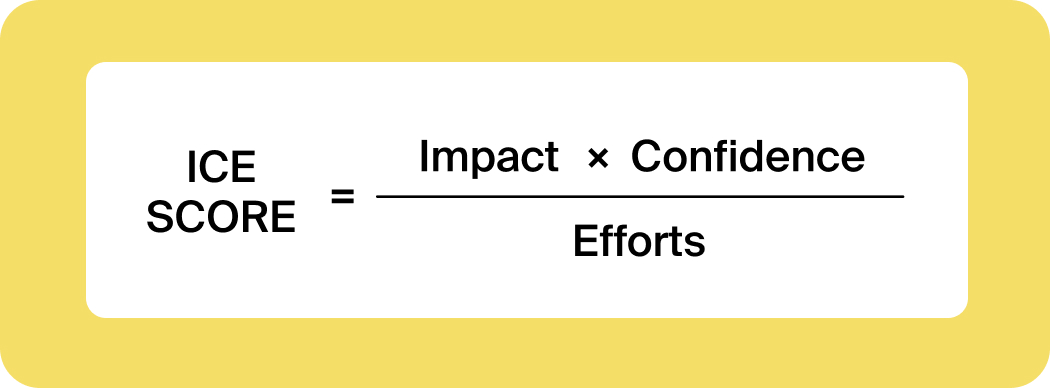

У этого метода есть модификация RICE (R от англ. reach, «охват»):

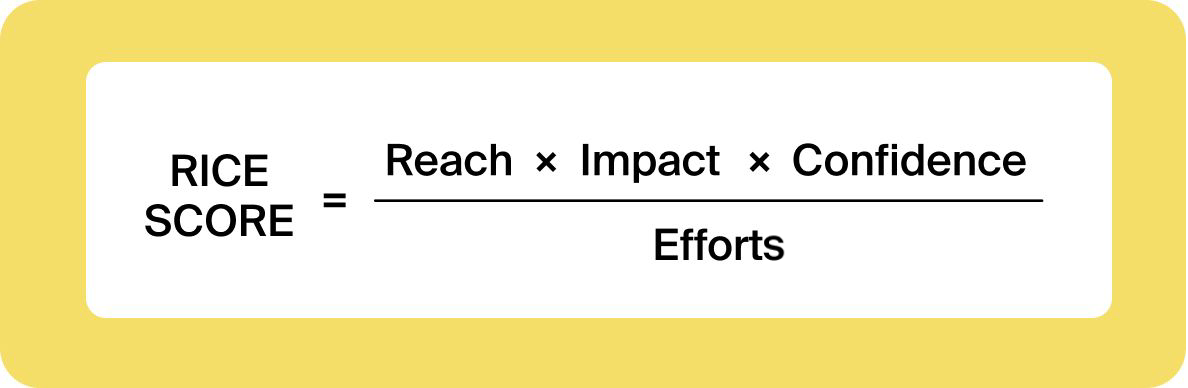

Фреймворк RICE состоит из четырёх компонент:<br>

Reach — скольких пользователей затронет изменение, которое вы хотите внести;<br>

Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;<br>

Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;<br>

Efforts — сколько стоит протестировать эту гипотезу.<br>

Как и в случае WSJF, параметры фреймворков ICE и RICE оценивают в удобных шкалах: например, от 0 до 10 или в числах ряда Фибоначчи.

##### Cпособ приоритизации гипотез - ICE

In [10]:
#посчитаем ICE по формуле и округлим значения до десятых долей
data['ICE'] = round(data['impact'] * data['confidence'] / data['efforts'], 1)

#расширим границы таблицы для прочтения данных столбца Hypothesis
pd.set_option('display.width', 2000)

display((data[['hypothesis', 'ICE']]).sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Наиболее перспективные гипотезы по ICE: 8 (Запустить акцию, дающую скидку на товар), 0 (Добавить два новых канала привлечения трафика), 7 (Добавить форму подписки на все основные странички), 6 (Показать на главной странице баннеры с актуальными товарами). 
<div>На первом месте гипотеза 8. 
<div>Так получилось, потому что ее параметр Impact = 9 и Confidence = 9, а Efforts = 5. То есть изменение "запустить акцию, дающую скидку на товар" -  сильно повлияет на пользователей, уверенность от внедрения данной гипотезы тоже высокая, а затраты на тестирование средние. Самой дорогостоящей гипотезой будет являться гипотеза "Запустить собственную службу доставки", так как Efforts = 10.
    

##### Cпособ приоритизации гипотез - RICE

In [11]:
#посчитаем RICE по формуле
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']

#расширим границы таблицы для прочтения данных столбца Hypothesis
pd.set_option('display.width', 1000)

display((data[['hypothesis', 'RICE']]).sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Наиболее перспективные гипотезы по RICE: 7 (Добавить форму подписки на все основные страницы) , 2 (Добавить блоки рекомендаций товаров на сайт интернет - магазина) , 0 (Добавить два новых канала привлечения трафика), 6 (Показать на главной странице баннеры с актуальными товарами). 

##### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
<div>На первом месте уже гипотеза под номером 7, а не 8 (как по оценке гипотез по методу ICE).
<div>Так получилось, потому что ее параметр Reach равен 10, в то время как у других гипотез он меньше (у гипотезы 2 - параметр Reach = 8, у гипотезы 0 - 3, у гипотезы 6 -  5).
<div>Кроме силы гипотез необходимо учитывать и то, как много пользователей она затронет. Так, гипотеза 7 затронет максимальное число пользователей 10 из 10 (так как параметры фреймворков оценивались по шкале от 0 до 10)

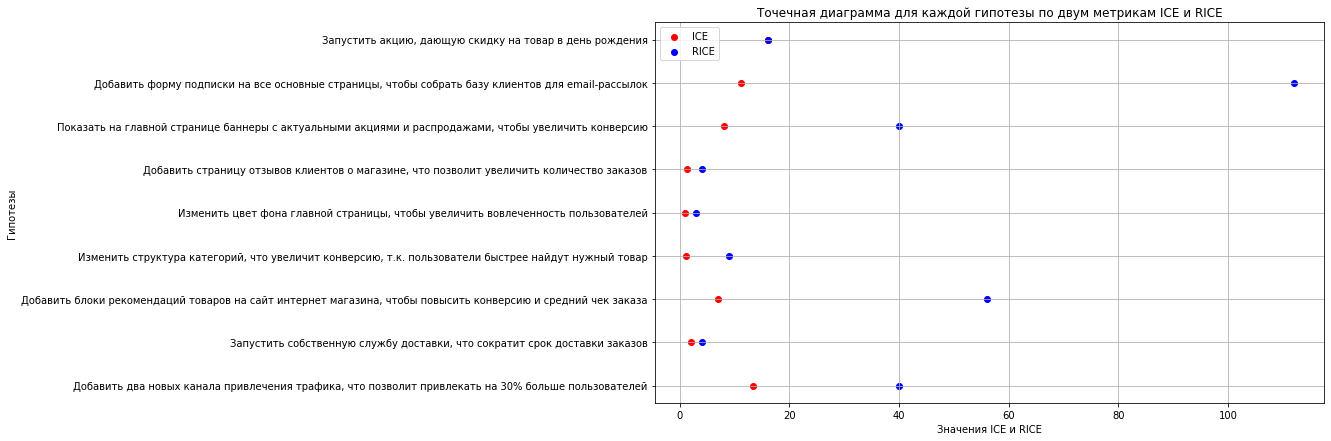

In [12]:
data[['hypothesis', 'ICE', 'RICE']].sort_values(by='RICE', ascending=False)
plt.figure(figsize=(12,7))
plt.grid()
x1 = data['ICE']
x2 = data['RICE']
y = data['hypothesis']
plt.xlabel('Значения ICE и RICE')
plt.ylabel('Гипотезы')
plt.scatter(x1, y, color = 'red', label = 'ICE')
plt.scatter(x2, y, color = 'blue', label = 'RICE')
plt.legend(loc = 'upper left')
plt.title('Точечная диаграмма для каждой гипотезы по двум метрикам ICE и RICE');

### Часть 2. Анализ A/B-теста

In [13]:
from scipy import stats as st
import numpy as np
import scipy.stats as stats
import math as mth
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
from matplotlib import pyplot as plt, dates
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

#### Знакомство с датафреймами

In [14]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [15]:
display(orders, visitors)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


##### Основная информация о датафреймах

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


#####  Замена названий столбцов (приведение к нижнему регистру)

In [18]:
# переименование столбцов в датафрейме data
orders = orders.rename(columns={'transactionId' : 'transaction_id', 'visitorId' : 'visitor_id'})

In [19]:
# проверка результатов - перечень названий столбцов
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

##### Исследование, проверка на пропуски в данных и изменение типов данных

In [20]:
#посчитаем количество пропусков в процентах в каждом столбце датафрейма orders
pd.DataFrame(round(orders.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
transaction_id,0.000000
visitor_id,0.000000
date,0.000000
revenue,0.000000
group,0.000000


In [21]:
#посчитаем количество пропусков в процентах в каждом столбце датафрейма visitors
pd.DataFrame(round(visitors.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
date,0.000000
group,0.000000
visitors,0.000000


In [22]:
#проверка на дубликаты в таблице orders
orders.duplicated().sum()

0

In [23]:
#проверка на дубликаты в таблице visitors
visitors.duplicated().sum()

0

**Выводы по предобработке данных**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Пропуски в данных не обнаружены.<br>
Дубликаты в датафреймах (orders и visitors) также отсутствуют.
<div>Cтолбцы с датой и временем переведены в соответствующий тип данных.

#### Анализ А/В - теста

Для проведения А/В-теста необходимо проверить есть ли пользователи, которые попали и в группу A и в группу В.<br>
Согласно теории, для проведения А/В-теста попавший в одну из групп посетитель остаётся в этой группе до конца теста. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно.<br>
В случае, если такие пользователи будут выявлены, их необходимо исключить до проведения анализа результатов теста. 

In [24]:
id_a = list(orders.query('group =="A"')['visitor_id'])
id_b = orders.query('group == "B"')
id_ab = id_b[id_b['visitor_id'].isin(id_a)]
exclude_id = (id_ab['visitor_id'].unique())

In [25]:
#исключим из исходного датафрейма visitor_id, которые попали и в группу A и в группу B
orders = orders.query('visitor_id not in @exclude_id')

In [26]:
#проверим количество строк в очищенном датафрейме orders
display(orders)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


##### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [27]:
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d')

#создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders и удалим дубликаты
datesGroups = orders[['date', 'group']].drop_duplicates()

#oбъявим переменную ordersAggregated
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date', 'group'])

#oбъявим переменную visitorsAggregated
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date', 'group'])

#определим переменную cumulativeData
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

#переименуем столбцы
cumulativeData.columns=['date', 'group', 'orders', 'buyers' , 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


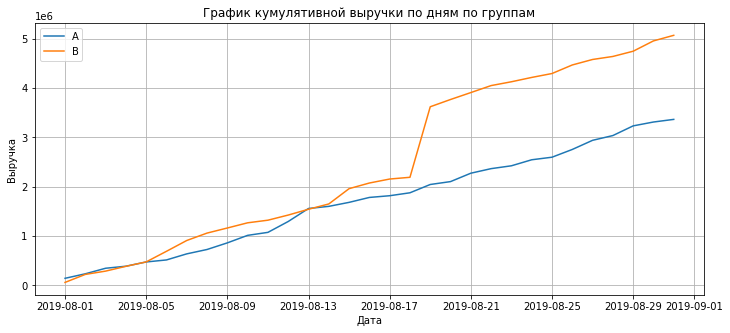

In [28]:
#oбъявим переменные cumulativeRevenueA
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

#oбъявим переменные cumulativeRevenueB
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

#построим графики кумулятивной выручки по дням по группам
plt.figure(figsize=(12,5))
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B')
plt.legend()
plt.title('График кумулятивной выручки по дням по группам')
plt.show();

**Выводы**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Сегмент В практически у истоков теста показывает положительную динамику, примерно в середине значительно вырывается вперед и продолжает лидировать весь остаток теста. Можно сделать предположение, что аномально большие заказы всё-таки влияют на результаты. При заключительном анализе нужно их будет обязательно удалить. 

##### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

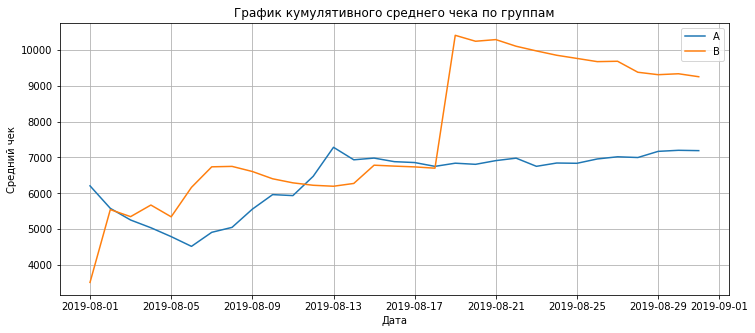

In [29]:
plt.figure(figsize=(12,5))
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label = 'B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам');

**Выводы**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Кумулятивное значение среднего чека по сегментам колеблется в первую половину проведения теста. Уже во вторую половину теста становится заметно, что, возможно, в группу В попали крупные заказы, поэтому на графике резкий всплеск по среднему чеку. Следовательно, группе В нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне. Скорее всего принимать решение по этой метрике рано. Требуется дополнительный анализ выбросов, которые так сильно искажают результаты.

##### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline() (от англ. horizontal line across the axis*, «горизонтальная линия поперек оси»):

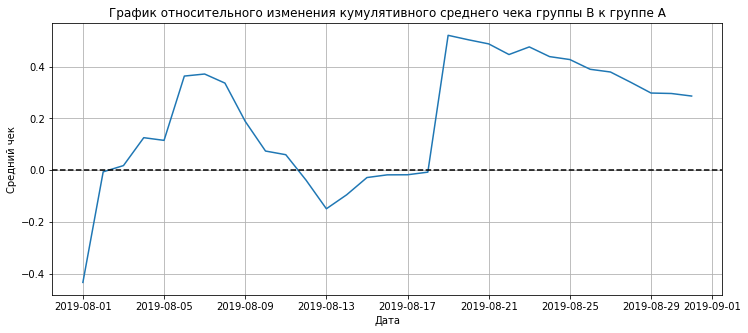

In [30]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = 'date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12,5))
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color ='black', linestyle = '--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A');

**Выводы**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.  

##### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

Аналогично проанализируем график кумулятивной конверсии.

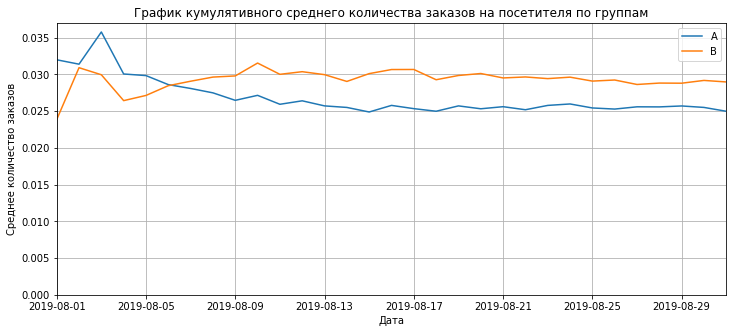

In [31]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# строим графики
plt.figure(figsize=(12,5))
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0, 0.037]);

**Выводы**

<p></p>

<div style="border:solid green 2px; padding: 20px">
В начале теста группа А имела большую конверсию, но постепенно группа В выровнялась и зафиксировалась примерно около одного значения, больше значения группы А. Я изменила масштаб графика, чтобы было видно, что абсолютное значение колебания в начале и в конце теста не слишком большое: от 2,5% до 3,5%. Если убрать масштаб осей, будет казаться, что колебания продолжаются, и конверсия не установилась около своего среднего значения. 

##### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

Построим график относительного различия кумулятивных конверсий.

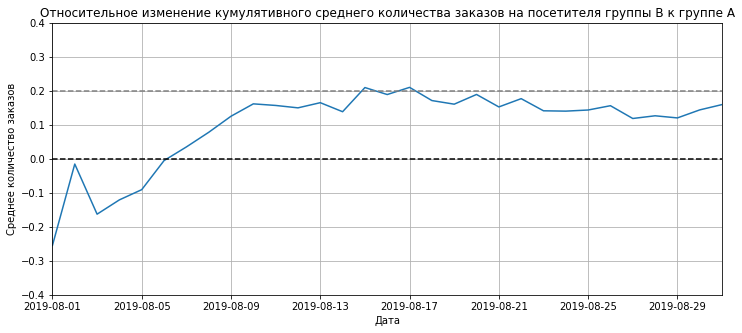

In [32]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']], \
left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# строим графики
plt.figure(figsize=(12,5))
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

# задаем масштаб осей
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.4, 0.4])
plt.title('Oтносительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A');

**Выводы**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Почти с самого начала теста группа В лидирует по конверсии: становится лучше и лучше относительно группы А. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.

##### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Подсчитаем количество заказов по пользователям и посмотрим на результат:

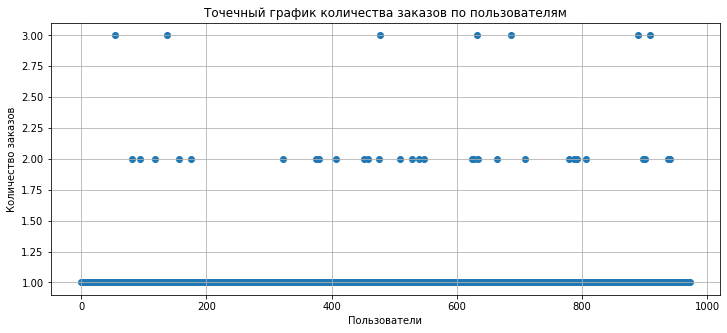

In [33]:
#подсчитаем число уникальных заказов по сгруппированным данным
ordersByUsers = orders.groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})

#oтсортируем по убыванию количества заказов пользователей
ordersByUsers.sort_values(by='transaction_id', ascending=False)

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(12,5))
plt.grid()
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.scatter(x_values, ordersByUsers['transaction_id'])
plt.title('Точечный график количества заказов по пользователям');


**Выводы**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Пользователей, заказавших более двух раз совсем мало. Они вполне могут быть аномальными. 

##### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [34]:
#через метод np.percentile('column', [percentile1, percentile2, percentile3]) найдем перцентили
print(np.percentile(ordersByUsers['transaction_id'], [95,99]))

[1. 2.]


**Выводы**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Не более 5% пользователей совершали больше одного заказа. И не более 1% пользователей - больше двух заказов.

##### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

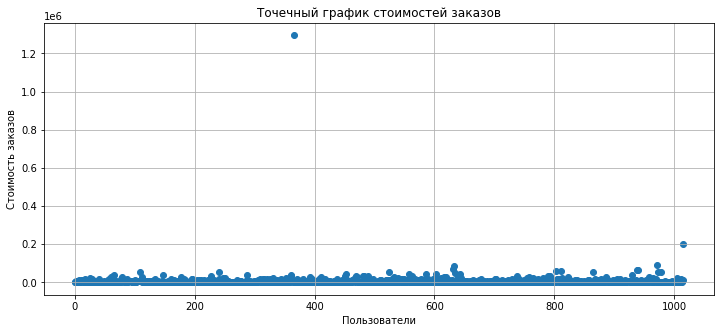

In [35]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12,5))
plt.grid()
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.scatter(x_values, orders['revenue'])
plt.title('Tочечный график стоимостей заказов');

**Выводы**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Большинство заказов всё-таки имеет нормальную выручку. Есть один заказ стоимостью 200 000 руб. Также есть выброс в районе 1 250 000 руб. Заказ на такую сумму в интернет-магазине выглядит весьма аномально. Посмотрим на выбросы в следующем блоке анализа. <br>
Если такой дорогой заказ попадёт в одну из групп теста, он сразу же исказит результаты и сделает победителем ту группу, где оказался. При этом такие покупки — редкость, исключение, которое проявилось не из-за тестирования гипотезы, а случайно.<br>
Такие аномально дорогие заказы следует удалять из теста. Можно провести и анализ самых дешёвых заказов. Однако из-за маленькой стоимости они слабо влияют на средний чек.

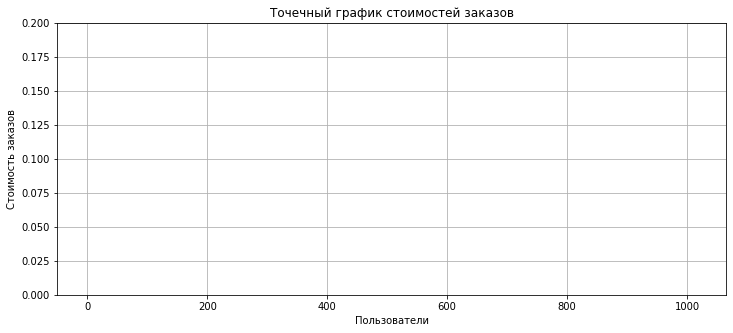

In [36]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12,5))
plt.grid()
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.scatter(x_values, orders['revenue'])
plt.title('Tочечный график стоимостей заказов')
plt.ylim([0, 0.2]);

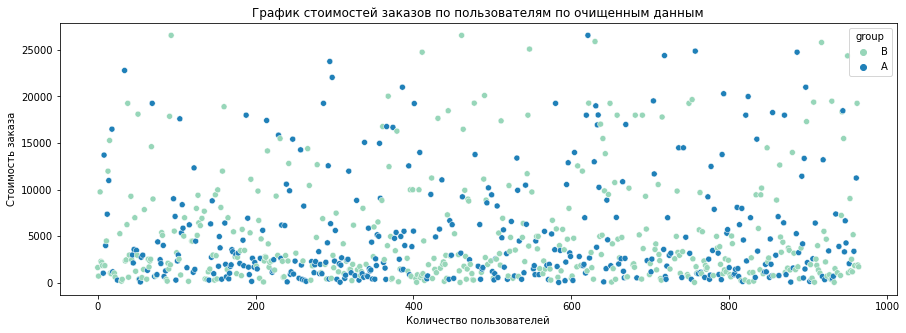

In [37]:
import seaborn as sns

orders_without_anomal = orders[orders['revenue'] < int(np.percentile(orders['revenue'], [95]))]
x_values = pd.Series(range(0,len(orders_without_anomal['revenue'])))

plt.figure(figsize=(15,5))
sns.scatterplot(data=orders_without_anomal, x=x_values, y='revenue', hue='group', palette='YlGnBu')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказа')
plt.title('График стоимостей заказов по пользователям по очищенным данным')
plt.show() 

##### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [38]:
#через метод np.percentile('column', [percentile1, percentile2, percentile3]) найдем перцентили
print(np.percentile(orders['revenue'], [95,99]))

[26785. 53904.]


**Выводы**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Не более, чем у 5% заказов чек дороже 26785 руб. И не больше, чем у 1% заказов - дороже 53904 руб.

##### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [39]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1,)
visitorsACummulative.columns = ['date', 'visitorsCumulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <=x['date']].agg(
        {'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1,)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False).agg({'transaction_id':pd.Series.nunique, 'revenue':'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersACummulative = ordersADaily.apply(
     lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
     {'date' : 'max', 'ordersPerDateA' : 'sum', 'revenuePerDateA' : 'sum'}), axis=1,).sort_values(by=['date'])
ordersACummulative.columns=['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily=(orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False).agg({'transaction_id':pd.Series.nunique, 'revenue':'sum'}))
ordersBDaily.columns=['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <=x['date']].agg(
    {'date':'max', 'ordersPerDateB' : 'sum', 'revenuePerDateB':'sum'}),axis=1,).sort_values(by=['date'])
ordersBCummulative.columns=['date', 'ordersBCummulativeB', 'revenueCummulativeB']

data_2 = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))

display(data_2.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersBCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCumulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Посчитаем статистическую значимость различия в среднем количестве заказов между группами.
Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['userId', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.



In [40]:
ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id':pd.Series.nunique}))
ordersByUsersA.columns=['visitor_id', 'transaction_id']

ordersByUsersB=(orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id':pd.Series.nunique}))
ordersByUsersB.columns=['visitor_id', 'transaction_id']

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [41]:
sampleA = pd.concat([ordersByUsersA['transaction_id'],pd.Series(0, index=np.arange(data_2['visitorsPerDateA'].sum()\
        - len(ordersByUsersA['transaction_id'])), name='transaction_id')],axis=0)
sampleB = pd.concat([ordersByUsersB['transaction_id'], pd.Series(0,index=np.arange(data_2['visitorsPerDateB'].sum()\
        - len(ordersByUsersB['transaction_id'])), name='transaction_id')], axis=0)

print('p-value', format(stats.mannwhitneyu(sampleA,sampleB)[1]))
print('Oтносительное различие среднего числа заказов группы B =', "{0:.3f}".format(sampleB.mean()/ sampleA.mean()-1))

p-value 0.8852382482379827
Oтносительное различие среднего числа заказов группы B = -0.010


**Выводы**

<p></p>

<div style="border:solid green 2px; padding: 20px">
По «сырым» данным различий в среднем числе заказов групп A и B нет.
Первое число — p-value = 0.885 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, не отвергаем. Однако относительный проигрыш группы B равен 1% — второе число в выводе.

##### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию `mannwhitneyu()` данные о выручке с заказов.
А ещё найдём относительные различия в среднем чеке между группами:

In [42]:
print('p-value', format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Oтносительное различие среднего чека между сегментами =', "{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value 0.8294908998149533
Oтносительное различие среднего чека между сегментами = 0.287


**Выводы**

<p></p>

<div style="border:solid green 2px; padding: 20px">
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Кроме того, относительное различие среднего чека между сегментами составляет 28,7%. 

##### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Найденные выше 95-й и 99-й перцентили средних чеков равны 26 785 и 53 904 рубля. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 1 и 2 заказа на пользователя.
Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 1 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 30 000 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`.

In [43]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transaction_id'] > 1]['visitor_id'],
        ordersByUsersB[ordersByUsersB['transaction_id'] > 1]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
928     204675465
684     358944393
36      366673373
648     382846391
Name: visitor_id, dtype: int64
59


**Выводы**

<p></p>

<div style="border:solid green 2px; padding: 20px">Всего 59 аномальных пользователей.
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.

Подготовим выборки количества заказов по пользователям по группам теста:

In [44]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data_2['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])
            ),
            name='transaction_id',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data_2['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])
            ),
            name='transaction_id',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [45]:
print('p-value', format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Oтносительное различие среднего числа заказов группы B =', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value 0.8898415560891251
Oтносительное различие среднего числа заказов группы B = -0.010


**Выводы**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Результаты по среднему количеству заказов практически не изменились.

##### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [46]:
print(
    'p-value', format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное различие между сегментами','{0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value 0.945909948762009
Относительное различие между сегментами -0.011


**Выводы**

<p></p>

<div style="border:solid green 2px; padding: 20px">
P-value увеличился, но и разница между сегментами сократилась с 28,7% до 1,1%. Хотя общие выводы по результатам теста не изменились.

##### Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

По результатам проведенного А/В-теста можно сделать следующие выводы:

1. Oтносительное различие среднего чека между группами составляет 28,7% по «сырым» данным. После фильтрации аномалий относительное различие среднего чека между группами сократилось с 28,7% до 1,1% ;
2. Нет статистически значимого различия по среднему количеству заказов между группами ни по «сырым», ни по данным после фильтрации аномалий. Относительный проигрыш группы B равен 1% и по «сырым» данным и по «очищенным»;
3. График различия конверсии между группами сообщает, что результаты группы А хуже группы В и нет значительной тенденции к улучшению. Почти с самого начала теста группа В лидирует по конверсии: становится лучше и лучше относительно группы А. 
4. График различия среднего чека говорит о том, что результаты группы B улучшаются день ото дня и сейчас почти на 30% лучше;<br><br>
Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент В на самом деле хуже сегмента A — практически нулевая.

### Выводы и рекомендации

<p></p>
<div style="border:solid green 2px; padding: 20px">
<div> <b>1. Приоритизация гипотез:</b>  <br><br>
<div><div>1.1. Наиболее перспективные гипотезы по ICE: 8 (Запустить акцию, дающую скидку на товар), 0 (Добавить два новых канала привлечения трафика), 7 (Добавить форму подписки на все основные странички), 6 (Показать на главной странице баннеры с актуальными товарами). 
<div>На первом месте гипотеза 8. 
<div>Так получилось, потому что ее параметр Impact = 9 и Confidence = 9, а Efforts = 5. То есть изменение "запустить акцию, дающую скидку на товар" -  сильно повлияет на пользователей, уверенность от внедрения данной гипотезы тоже высокая, а затраты на тестирование средние. Самой дорогостоящей гипотезой будет являться гипотеза "Запустить собственную службу доставки", так как Efforts = 10.<br><br>
<div> 1.2.Наиболее перспективные гипотезы по RICE: 7 (Добавить форму подписки на все основные страницы) , 2 (Добавить блоки рекомендаций товаров на сайт интернет - магазина) , 0 (Добавить два новых канала привлечения трафика), 6 (Показать на главной странице баннеры с актуальными товарами).<br><br>
<div> 1.3. Как изменилась приоритизация гипотез при применении RICE вместо ICE? <br><br> На первом месте уже гипотеза под номером 7, а не 8 (как по оценке гипотез по методу ICE).
<div>Так получилось, потому что ее параметр Reach равен 10, в то время как у других гипотез он меньше (у гипотезы 2 - параметр Reach = 8, у гипотезы 0 - 3, у гипотезы 6 -  5).
<div>Кроме силы гипотез необходимо учитывать и то, как много пользователей она затронет. Так, гипотеза 7 затронет максимальное число пользователей 10 из 10 (так как параметры фреймворков оценивались по шкале от 0 до 10)
<br><br>
<div> <b>2. Рекомендации для отдела маркетинга по результатам проведенного А/В - теста:</b>   <br><br>
<div><div> 2.1. Тест следует остановить и признать его успешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент В на самом деле хуже сегмента A — практически нулевая.<br><br>
    2.2. Перед анализом результатов А/В-теста необходимо проверять есть ли пользователи, которые попали и в группу А и в группу В. Таких пользователей было 58 в данном проекте, что не является нормой, поэтому они были исключены из анализа. 
    